## Môi trường code

Thực hiện cái đặt môn trường code cho đồ án:
- Code trên môi trường Linux
- Dùng Jupyter Notebook hoặc Jupyter Lab để code file .ipynb.
- Dùng phiên bản các package như trong file "min_ds-env.yml"

In [1]:
import sys
sys.executable

'C:\\Users\\tt\\miniconda3\\envs\\min_ds-env\\python.exe'

## Import modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import numpy as np

import seaborn as sns

## I. Collecting data

### 1.1 What subject is your data about? What is the source of your data?

Dữ liệu về Melbourne Housing Market, giá nhà (bất động sản) trong vòng 3 năm 2016 - 2018 của Melbourne nước Úc. <br>
Source: [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market)

### 1.2 Do authors of this data allow you to use like this? You can check the data license

**Reason**: Should I hold off even longer in buying a two bedroom apartment in Northcote? This is the real reason for me in publishing this dataset :) <br><Tôi có nên trì hoãn lâu hơn nữa để mua một căn hộ hai phòng ngủ ở Northcote không? Đây là lý do thực sự để tôi xuất bản tập dữ liệu này :)>.

**License**: CC BY-NC-SA 4.0  => tự do chia sẻ (sao chép và phân phối lại tài liệu ở bất kỳ phương tiện hoặc định dạng nào) và điều chỉnh (phối lại, chuyển đổi và xây dựng dựa trên tài liệu).

### 1.3 How did authors collect data?

This data was scraped from publicly available results posted every week from Domain.com.au, <br> <Dữ liệu này được thu thập từ các kết quả có sẵn công khai được đăng hàng tuần từ Domain.com.au.>

    The dataset includes: Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

## II. Exploring data

In [3]:
file = pd.read_csv('dataset/MELBOURNE_HOUSE_PRICES_LESS.csv')
file.head()

Suburb           Address  Rooms Type      Price Method   SellerG  \
0    Abbotsford     49 Lithgow St      3    h  1490000.0      S    Jellis   
1    Abbotsford     59A Turner St      3    h  1220000.0      S  Marshall   
2    Abbotsford     119B Yarra St      3    h  1420000.0      S    Nelson   
3    Aberfeldie        68 Vida St      3    h  1515000.0      S     Barry   
4  Airport West  92 Clydesdale Rd      2    h   670000.0      S    Nelson   

        Date  Postcode             Regionname  Propertycount  Distance  \
0  1/04/2017      3067  Northern Metropolitan           4019       3.0   
1  1/04/2017      3067  Northern Metropolitan           4019       3.0   
2  1/04/2017      3067  Northern Metropolitan           4019       3.0   
3  1/04/2017      3040   Western Metropolitan           1543       7.5   
4  1/04/2017      3042   Western Metropolitan           3464      10.4   

                  CouncilArea  
0          Yarra City Council  
1          Yarra City Council  
2          Yarra City Council  
3  Moonee Valley City Council  
4  Moonee Valley City Council

### 2.1 Kiểm tra xem có bao nhiều dòng và cột trong dữ liệu | dataset

In [4]:
num_rows, num_cols = file.shape
file.shape

(63023, 13)

Vậy dữ liệu hiện tại có:
- `Dòng`: **63023** dữ liệu
- `Cột`: **13** cột thuộc tính

### 2.2 Ý nghĩa của từng dòng trong tập dữ liệu | dataset

Theo dữ liệu mô tả và yêu cầu của tác giả của chủ đề "Melbourne Housing Market". Melbourne ở Úc đã trải qua hiện tượng bong bóng nhà đất (một số chuyên gia cho rằng nó có thể vỡ sớm) trong năm 2016 - 2017.

    Và theo sự quan sát sơ bộ về tập dữ liệu thì một đòng cho biết thông tin của một ngôi nhà đang được rao giá, và hầu hết dữ liệu đều như vậy.

### 2.3 Kiểm tra xem có dòng nào bị trùng trong bộ dữ liệu không ?

In [5]:
def check_duplication(dup_df):
    if len(dup_df) == 0:
        return False;
    else:
        return True;

In [6]:
have_duplicated_rows = bool
dup_df = file[file.duplicated(keep=False)]
have_duplicated_rows = check_duplication(dup_df)
print(have_duplicated_rows)
dup_df

True


Suburb         Address  Rooms Type      Price Method   SellerG  \
8041   Fitzroy North  5/16 Taplin St      2    h  1010000.0     SP  Woodards   
8042   Fitzroy North  5/16 Taplin St      2    h  1010000.0     SP  Woodards   
33941     Nunawading   1/7 Lilian St      3    t        NaN     SP    Jellis   
33942     Nunawading   1/7 Lilian St      3    t        NaN     SP    Jellis   

             Date  Postcode             Regionname  Propertycount  Distance  \
8041    5/05/2018      3068  Northern Metropolitan           6244       3.6   
8042    5/05/2018      3068  Northern Metropolitan           6244       3.6   
33941  17/06/2017      3131   Eastern Metropolitan           4973      15.4   
33942  17/06/2017      3131   Eastern Metropolitan           4973      15.4   

                   CouncilArea  
8041     Moreland City Council  
8042     Moreland City Council  
33941  Manningham City Council  
33942  Manningham City Council

Từ kết quả trên ta có thể dễ nhận thấy dữ liệu bị trùng, nối tiếp nhau. Dòng 8042 lặp lại của dòng 8041 và 33942 lặp lại của 33941.

    Kết luận có lẽ vào thời điểm đó tác giả ngừng thu thập dữ liệu và ngày tiếp theo vẫn tiếp tục lưu trữ bị trùng ở mặt đó

##### Xử lí, loại bộ dữ liệu bị trùng.

In [7]:
file.drop_duplicates()
dup_df = file[file.duplicated(keep=False)]
have_duplicated_rows = check_duplication(dup_df)
print(have_duplicated_rows)

True


### 2.4 Mỗi cột sẽ có ý nghĩa như thế nào ?

Mô tả về các cột | attributes của tập dữ liệu "MELBOURNE_HOUSE_PRICES_LESS.csv".
- **Suburb**: ngoại ô, nơi không nằm trong khu vực của Melbourne CBD.
- **Address**: địa chỉ của ngôi nhà.
- **Rooms**: số lượng phòng có trong ngôi nhà.
- **SellerG**: đại lí bất động sản
- **Date**: ngày được bán
- **Regionname**: khu vực trong Melbourne CBD
- **Propertycount**: số lượng bất động sản tồn tại ở vùng ngoại ô (Suburb)
- **Distance**: khoảng cách kilometers từ ngôi nhà so với Melbourne CBD (trung tâm thương mai Melbourne) 
- **CouncilArea** Hội động quản trị khu vực (Governing council for the area)
- **PostCode**: mã bưu chính
- **Price**: giá ngôi nhà
<br> </br>
- **Type**: phân loại của ngôi nhà
    - Nếu là **br** - bedroom(s);
    - Nếu là **h** - house,cottage,villa, semi,terrace;
    - Nếu là **u** - unit, duplex;
    - Nếu là **t** - townhouse;
    - Nếu là **dev site** - development site;
    - Nếu là **o res** - other residential.  
- **Method**: phương thức giao dịch bất động sản
    - Nếu là **S** - property sold;
    - Nếu là **SP** - property sold prior;
    - Nếu là **PI** - property passed in;
    - Nếu là **PN** - sold prior not disclosed;
    - Nếu là **SN** - sold not disclosed;
    - Nếu là **NB** - no bid;
    - Nếu là **VB** - vendor bid;
    - Nếu là **W** - withdrawn prior to auction;
    - Nếu là **SA** - sold after auction;
    - Nếu là **SS** - sold after auction price not disclosed.
    - Nếu là **N/A** - price or highest bid not available.

### 2.4 Kiểm tra từng kiểu dữ liệu của từng cột. Có cột nào có dữ liệu chưa phù hợp hay không ?

In [8]:
file.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

Hiện tại có dữ liệu của cột <b>Date</b> chưa đúng với dạng "daytime", xử lí dữ liệu phần dưới !

In [9]:
file['Date'] = pd.to_datetime(file['Date'])
file.head()

Suburb           Address  Rooms Type      Price Method   SellerG  \
0    Abbotsford     49 Lithgow St      3    h  1490000.0      S    Jellis   
1    Abbotsford     59A Turner St      3    h  1220000.0      S  Marshall   
2    Abbotsford     119B Yarra St      3    h  1420000.0      S    Nelson   
3    Aberfeldie        68 Vida St      3    h  1515000.0      S     Barry   
4  Airport West  92 Clydesdale Rd      2    h   670000.0      S    Nelson   

        Date  Postcode             Regionname  Propertycount  Distance  \
0 2017-01-04      3067  Northern Metropolitan           4019       3.0   
1 2017-01-04      3067  Northern Metropolitan           4019       3.0   
2 2017-01-04      3067  Northern Metropolitan           4019       3.0   
3 2017-01-04      3040   Western Metropolitan           1543       7.5   
4 2017-01-04      3042   Western Metropolitan           3464      10.4   

                  CouncilArea  
0          Yarra City Council  
1          Yarra City Council  
2          Yarra City Council  
3  Moonee Valley City Council  
4  Moonee Valley City Council

### 2.5 Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?
Các cột numeric gồm có "Price", "Date", "Distance"

In [10]:
numeric_df = file[["Price", "Date", "Distance"]]
percent_missing = numeric_df.isnull().sum() * 100 / len(numeric_df)
percent_missing = round(percent_missing, 2)
min_df = numeric_df.min(axis = 0)
max_df = numeric_df.max(axis = 0)
nume_col_profiles_df = pd.DataFrame([percent_missing, min_df, max_df], index=['missing_ratio', 'min', 'max'])
nume_col_profiles_df

Price                 Date  Distance
missing_ratio        23.15                  0.0       0.0
min               85000.00  2016-01-28 00:00:00       0.0
max            11200000.00  2018-12-05 00:00:00      64.1

#### 2.5.1 Biểu diễn những giá trị bị thiếu

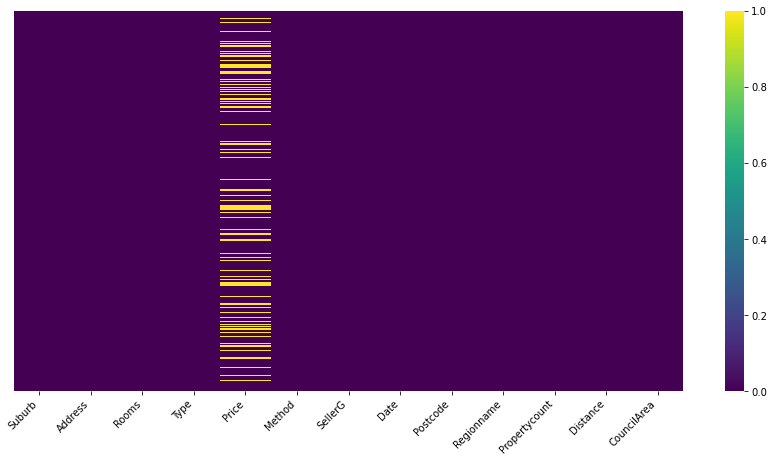

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
g = sns.heatmap(file.isnull(), yticklabels=False,cmap='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Từ hình mô tả trên, ta nhận thấy dữ liệu ở cột `Price`: giá tiền của các ngôi nhà bị thiếu và dàn trải ở hầu hết toàn bộ dữ liệu

### 2.6 Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?
Các côt categorical gồm có "Suburb", "Address", "Rooms", "Type", "Method", "SellerG", "Postcode", "Regionname", "Propertycount", "CouncilArea"

In [12]:
categorical_df = file[["Suburb", "Address", "Rooms", "Type", "Method", "SellerG", "Postcode", "Regionname", "Propertycount", "CouncilArea"]]
percent_missing = categorical_df.isnull().sum() * 100 / len(numeric_df)
percent_missing = round(percent_missing, 2)
num_unique_values = categorical_df.nunique()
lst = []
for col in categorical_df:
    lst.append(categorical_df[col].dropna().unique())
unique_values = pd.Series(lst, index=["Suburb", "Address", "Rooms", "Type", "Method", "SellerG", "Postcode", "Regionname", "Propertycount", "CouncilArea"])
cate_col_profiles_df = pd.DataFrame([percent_missing, num_unique_values, unique_values], index=['missing_ratio', 'num_diff_vals', 'diff_vals'])
cate_col_profiles_df

Suburb  \
missing_ratio                                                0.0   
num_diff_vals                                                380   
diff_vals      [Abbotsford, Aberfeldie, Airport West, Albanva...   

                                                         Address  \
missing_ratio                                                0.0   
num_diff_vals                                              57754   
diff_vals      [49 Lithgow St, 59A Turner St, 119B Yarra St, ...   

                                                         Rooms       Type  \
missing_ratio                                              0.0        0.0   
num_diff_vals                                               14          3   
diff_vals      [3, 2, 6, 4, 1, 5, 7, 8, 11, 10, 12, 9, 31, 16]  [h, t, u]   

                                           Method  \
missing_ratio                                 0.0   
num_diff_vals                                   9   
diff_vals      [S, SP, PI, SN, VB, PN, SA, W, SS]   

                                                         SellerG  \
missing_ratio                                                0.0   
num_diff_vals                                                476   
diff_vals      [Jellis, Marshall, Nelson, Barry, hockingstuar...   

                                                        Postcode  \
missing_ratio                                                0.0   
num_diff_vals                                                225   
diff_vals      [3067, 3040, 3042, 3021, 3206, 3020, 3078, 301...   

                                                      Regionname  \
missing_ratio                                                0.0   
num_diff_vals                                                  8   
diff_vals      [Northern Metropolitan, Western Metropolitan, ...   

                                                   Propertycount  \
missing_ratio                                                0.0   
num_diff_vals                                                368   
diff_vals      [4019, 1543, 3464, 1899, 3280, 2185, 2211, 530...   

                                                     CouncilArea  
missing_ratio                                                0.0  
num_diff_vals                                                 34  
diff_vals      [Yarra City Council, Moonee Valley City Counci...

Một chút đánh giá nhỏ:
- Các cột `categorical` không bị thiếu giá trị.
- Phương thức giao dịch bất động sản có `9 phương thức`.
- Có `57754 địa chỉ` cho ngôi nhà trên thị trường bất động sản.
- Có tất cả `476 nhà thầu, đại lí bất động sản`.
- Tổng có `368 mã bưu chính`.
- Cuối cùng về các hội đồng quả trị khu vực có `34 tổ chức`. 

## III.  Asking meaningful questions

<b>Câu 1</b>: Giá cả nhà đất ở Melbourne thay đổi như thế nào trong vòng 3 năm từ 2016 - 2018, điều này ảnh hưởng gì đến doanh thu bất động sản ở đây?

<b>Câu 2</b>: Nhận định best seller về bất động sản ở Melbourne, đâu là điểm mạnh, điểm yếu của những seller này ? Từ đó có thể đưa ra chiến lược hợp tác giữa chủ nhà đất và seller.


### 3.1 Các biến chính / key variables nào được khai thác 

<b>Các thành phần chính được sử dụng</b>:
- `Price`: với giá nhà đất, ban đầu có thể nhận thấy thiếu 23.15 % dữ liệu điều đó cho thấy tầm quan trọng trong quá trình việc xử lí giá trị thiếu của giá nhà đất (có thể xử lí bằng việc điền mean hoặc có thể bỏ những giá trị null).
- `Date`: thể hiện số ngày của đất, ngôi nhà đó được nhà thầu bất động sản trao giá.
- `Regionname`: bao gồm 7 khu vực trực thuộc của trung tâm thương mai Melbourne (Melbourne CBD)

<b>Các thành phần phụ giúp phần so sánh với cột `Price`, nói chính xác ra thì các cột mà nhóm em sẽ khai thác chính đó bao gồm</b>: 

- `Rooms`: có 14 giá trị khác nhau, số lượng phòng có trong ngôi nhà đó.
- `Type`: hiện có 3 kiểu khác nhau đó chính là "h, t, u" đồng nghĩa với " house, unit và townhouse;".
- `Method`: hiện tại có 9 phương thức giao dịch bất động sản, tuy nhiên có 4 phương thức mang giá trị null như là "PN", "SN", "SS" và "W".
- `Distance`: khoảng cách của các ngôi nhà so với trung tâm thương mai Melbourne (quan trọng trong việc định giá nhà).
- `SellerG`: đại lí bất động sản, chủ yếu mục đích so sánh với các seller khác.

### 3.2 Những hướng để đi tìm câu trả lời 

**Câu 1**: Giá cả nhà đất ở Melbourne thay đổi như thế nào trong vòng 3 năm từ 2016 - 2018, điều này ảnh hưởng gì đến doanh thu bất động sản ở đây?
- Bước đầu, biểu diễn tổng quát doanh thu trong từng tháng của 3 năm từ 2016 - 2018.
- Tiếp theo, biểu diễn tổng số lượng nhà đã bán ra trong từng tháng của 3 nằm từ 2016 - 2018.
- Sử dụng trường dữ liệu `Regionname` để nhìn rõ hơn về `Price` được phân bố trong khu vực của Melbourne.
- Tiếp đến, biểu diễn sự thay đổi giá nhà theo thời gian
- Kết luận được tình trạng bong bong nhà đất ở Melbourne diễn ra khi nào và tại sao ?
- Cuối cùng so sánh thêm một số trường dữ liệu có thể ảnh hưởng đến giá nhà.

**Câu 2**:  Nhận định best seller về bất động sản ở Melbourne, đâu là điểm mạnh, điểm yếu của những seller này ? Từ đó có thể đưa ra chiến lược hợp tác giữa chủ nhà đất và seller.
- Đầu tiên, ta sẽ biểu diễn top 10 `sellerG` đại lí bất động sản, đã bán được số lượng nhà trong 3 năm.
- Thứ 2, đi sâu vào từng `sellerG` (chủ yếu top 3), để nhận định được điểm mạnh và điểm yếu của những seller này.
- Đối với một kiểu nhà cụ thể so sánh giữa các `sellerG` bán được số lượng. 
- Từ đó kết luận chiến lược hợp tác giữa chủ bất động sản và các đại lí bất động sản `sellerG`.

## IV. Preprocessing + analyzing data to answer each question

## 4.1 Tiền xử lí dữ liệu

Với biến `Price` như trên bị thiếu mất 23.15 % dữ liệu, nên ta cần tiền xử lí dữ liệu trước

Xử lí dữ liệu ở cột `Price` bằng cách: 

In [13]:
file["Price"] = file.groupby(['Regionname', 'Rooms', 'Type', 'Method']).transform(lambda x: x.fillna(x.mean()))
file["Price"] = file.groupby(['Regionname', 'Rooms', 'Type']).transform(lambda x: x.fillna(x.mean()))
mean_value = file['Price'].mean()
file['Price'].fillna(value=mean_value, inplace=True)

Double check lại lần nữa xem có giá trị nào bị thiếu nữa không ?

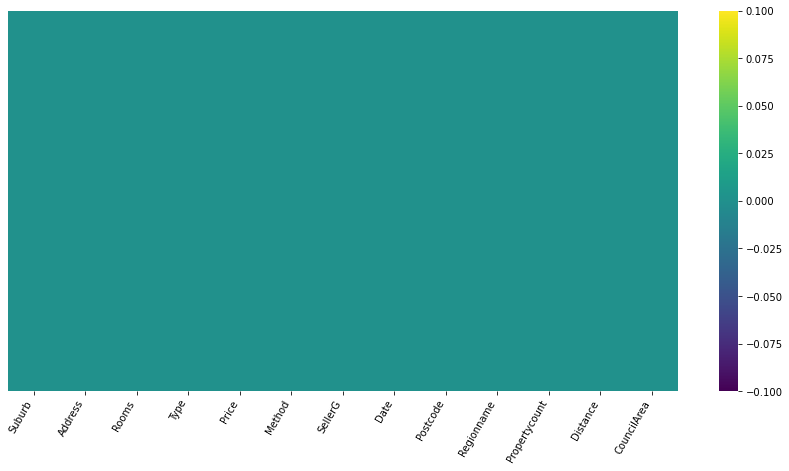

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
g = sns.heatmap(file.isnull(), yticklabels=False,cmap='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()

**Như kết quả thấy ở trên**: Hiện tại không có cột nào bị thiếu giá trị !

## 4.2 Trực quan hóa dữ liệu và trả lời câu hỏi 

## 4.2.1 Câu hỏi 1: Giá cả nhà đất ở Melbourne thay đổi như thế nào trong vòng 3 năm từ 2016 - 2018, điều này ảnh hưởng gì đến doanh thu bất động sản ở đây?

### a) Cụ thể hơn thì tình trạng giá nhà đất ở Melbourne bị tăng mạnh ở thời gian nào và thời điểm nào ? 

##### Thể hiện ở mức tổng quát bằng cách biểu diễn tổng giá trị `Price` từ 2016 - 2018 lên biểu đồ đường

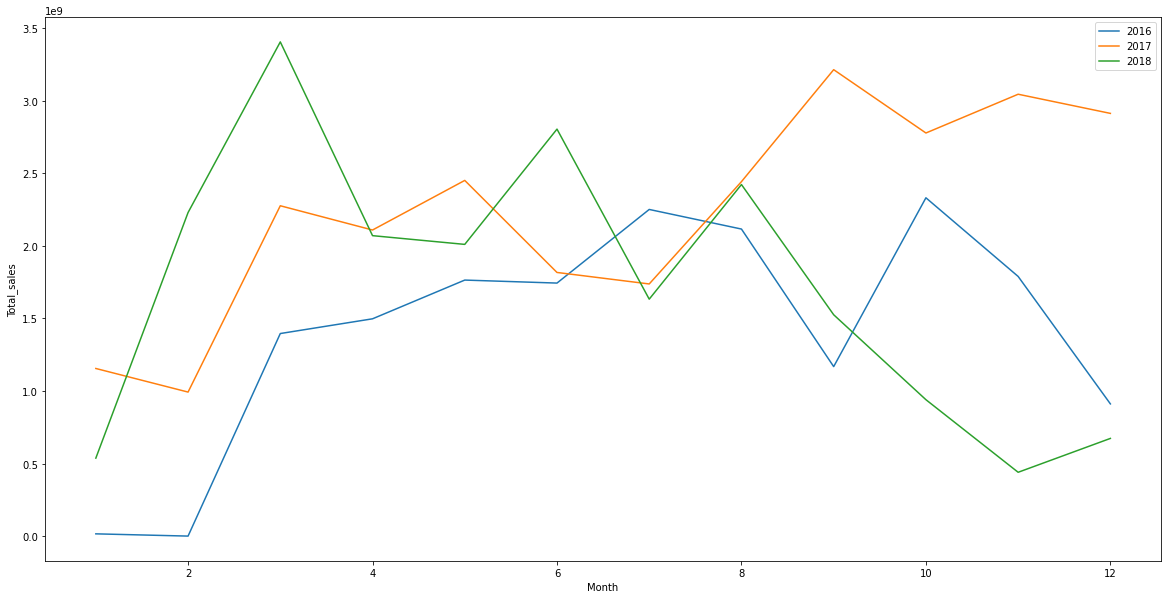

In [15]:
file['Month'] = file['Date'].dt.month
file['Year'] = file['Date'].dt.year

idx = np.array(range(12)) + 1
     
temp_df = file[["Price", "Month", "Year"]]
total_sales_each_month_series = temp_df.groupby(['Month','Year']).sum()

lst = list(total_sales_each_month_series['Price'])
lst.insert(3, 0)
lst = np.reshape(lst, (12, 3))
total_sales_each_month_df = pd.DataFrame(lst, columns=[2016, 2017, 2018], index=idx)
total_sales_each_month_df.plot.line(xlabel='Month', ylabel='Total_sales', figsize=(20,10))
plt.show()

##### Tổng số lượng nhà đã bán ra theo tháng từ năm 2016 - 2018

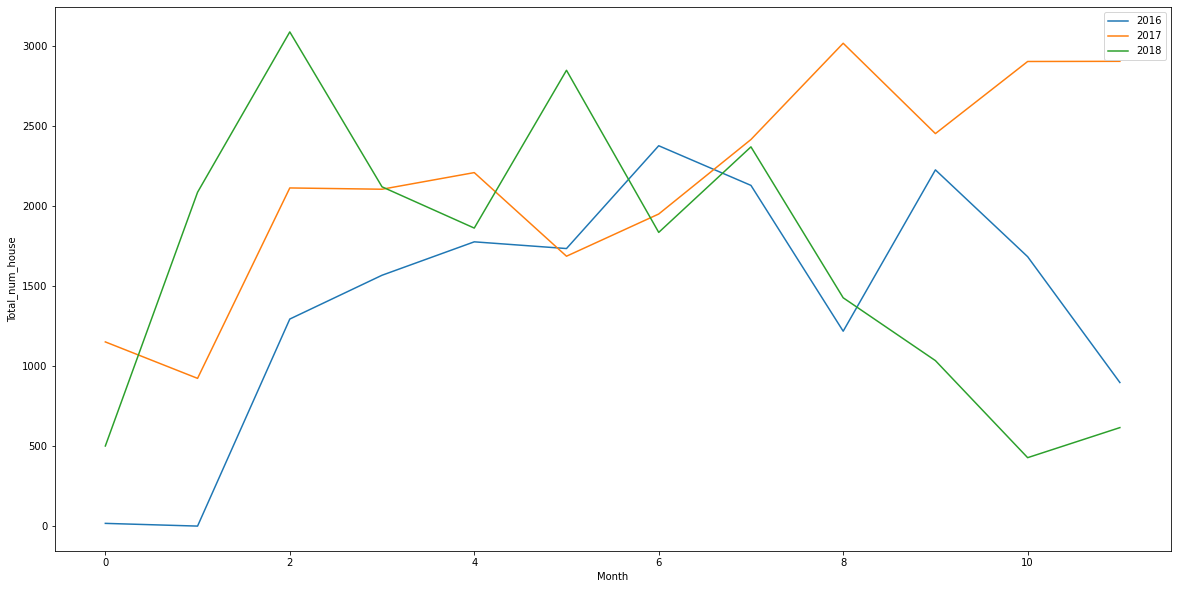

In [59]:
num_house = []
for i in range(3):
    for j in range(12):
        slow_down_df = file[(file['Month'] == j + 1) & (file['Year'] == 2018 - i)]
        num_house.append(len(slow_down_df))
num_house = np.reshape(num_house, (3, 12))
num_house = zip(*num_house[::-1])
num_house = np.flip(num_house, axis=None)
total_num_house_each_month_df = pd.DataFrame(num_house, columns=[2016, 2017, 2018])
total_num_house_each_month_df.plot.line(xlabel='Month', ylabel='Total_num_house', figsize=(20,10))
plt.show()

Số lượng nhà bán ra không có gì bất thường so với doanh thu, doanh thu tăng giảm kéo theo số lượng nhà bán ra cũng thay đổi tương ứng

##### Đi sâu vào những giá trị ở cột `Regionname` để nhìn rõ hơn về `Price` được phân bố trong khu vực của Melbourne

In [17]:
# Sắp xếp dữ liệu trước khi vẽ HEATMAP 
sort_date_df = file.sort_values(by='Date').reset_index().drop(columns=['index'])
# Lấy các tên trong có trong cột RegionName
region_lst = list(cate_col_profiles_df['Regionname']['diff_vals'])

##### Xử lí dữ liệu, tính tổng giá nhà trong các tháng của năm 2016

In [18]:
def create_heat_arr(time):
    flag = int(time)
    heat_arr = np.zeros((8,12)) #8 regionname in melburne and 12 month in year 2016
    for i in range(len(sort_date_df)):
        if sort_date_df['Date'][i].year == flag:
            if sort_date_df['Regionname'][i] in region_lst:
                string = str(sort_date_df['Regionname'][i])
                heat_arr[region_lst.index(string), sort_date_df['Date'][i].month - 1] += sort_date_df['Price'][i]   
    return heat_arr

##### Biểu diễn lên biểu đồ heat map để tìm câu trả lời 

In [19]:
# tạo các arr để biểu diễn lên biểu đồ nhiệt
heat_arr_01 = create_heat_arr('2016')
heat_arr_02 = create_heat_arr('2017')
heat_arr_03 = create_heat_arr('2018')

In [20]:
fig = px.imshow(heat_arr_01,
               labels=dict(x="Month in Year 2016", y="Region Name", color="No. Total Price"),
                x=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                y=region_lst, color_continuous_scale='Viridis',
               title='tổng giá nhà có trong dữ liệu theo từng tháng trong năm 2016')
fig.update_xaxes(side="bottom")
fig.show()
fig = px.imshow(heat_arr_02,
               labels=dict(x="Month in Year 2017", y="Region Name", color="No. Total Price"),
                x=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                y=region_lst, color_continuous_scale='Viridis',
               title='tổng giá nhà có trong dữ liệu theo từng tháng trong năm 2017')
fig.update_xaxes(side="bottom")
fig.show()
fig = px.imshow(heat_arr_03,
               labels=dict(x="Month in Year 2018", y="Region Name", color="No. Total Price"),
                x=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                y=region_lst, color_continuous_scale='Viridis',
               title='tổng giá nhà có trong dữ liệu theo từng tháng trong năm 2018')
fig.update_xaxes(side="bottom")
fig.show()

### Sự thay đổi giá nhà theo thời gian

Sự phân bố `Type` kiểu nhà và `Rooms` số phòng có trong nhà hiện hữu trong tập dữ liệu

In [21]:
file.groupby(by=['Rooms', 'Type']).size().sort_values(ascending=False)

Rooms  Type
3      h       22017
4      h       14479
2      u        7216
       h        4503
3      t        3554
5      h        3389
3      u        2379
1      u        1933
2      t        1529
4      t        1152
6      h         419
1      h         142
4      u         116
7      h          60
5      t          41
1      t          36
8      h          26
10     h           7
6      u           5
9      h           4
12     h           4
5      u           4
8      u           2
9      t           1
8      t           1
11     h           1
7      t           1
16     h           1
31     h           1
dtype: int64

Ở đây ta xét khu vực **Northern Metropolitan**, kiểu nhà có **3 phòng** (loại nhà được bán nhiều nhất ở Melbourne)

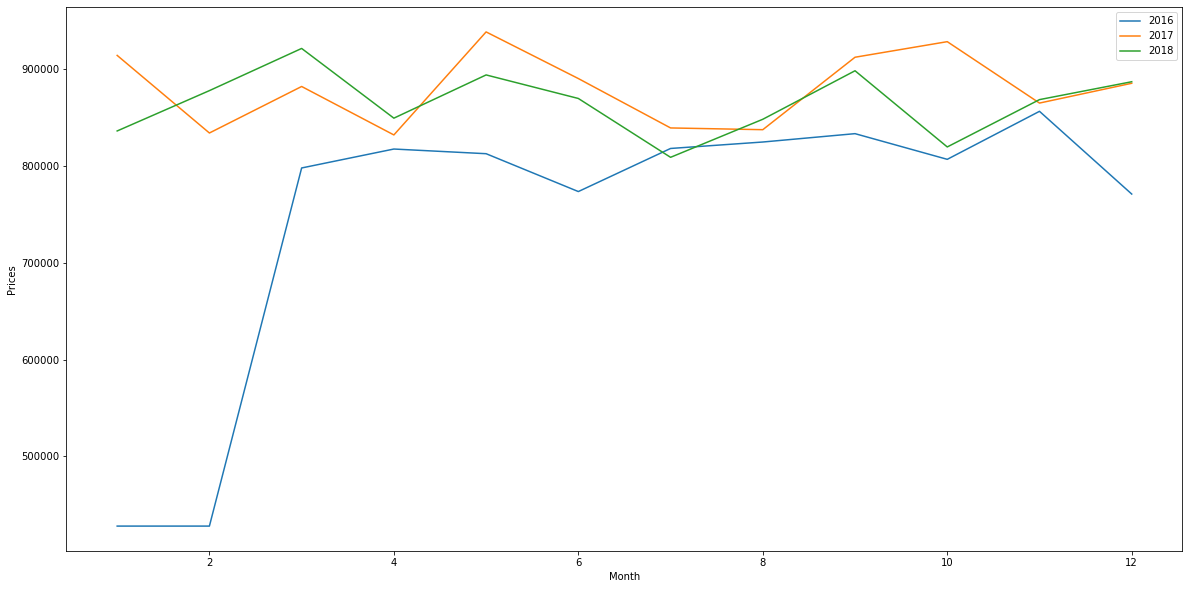

In [22]:
region_df = file[(file['Type'] == 'h') & (file['Rooms'] == 3) & (file['Regionname'] == 'Northern Metropolitan')]
region_df = region_df[["Price", "Month", "Year"]]

mean_df = region_df.groupby(['Month','Year']).mean()

lst = list(mean_df['Price'])
lst.insert(3, lst[0])
lst = np.reshape(lst, (12, 3))
change_df = pd.DataFrame(lst, columns=[2016, 2017, 2018], index=idx)
change_df.plot.line(xlabel='Month', ylabel='Prices', figsize=(20,10))
plt.show()

Hiện tượng bong bóng nhà đất (giá đất bất động sản tăng đột biến): <br>
**Xảy ra ở thời điểm tháng 3/2016 ở khu vực phía nam của trung tâm thương mại Melbourne (Melbourne CBD) và lần lượt giá nhà thăng dần theo từng tháng**.

- **Ở năm 2016**: doanh thu được tăng một mức điều độ nhưng với mức giá khủng và đạt đỉnh điểm vào tháng 10/2016, sau đó qua tháng 11 và tháng 12 giảm đần: `=> điều đó cho thấy người nhân đã bắt đầu quyết định thu mua bất động sản như là một cách đầu tư thu lời.`
- **Ở năm 2017**: doanh thu cũng được tăng dần từ những tháng đầu tiên nhưng với cường độ bắt đầu mãnh liệt hơn (với những tháng đầu giá nhà chỉ ở mức độ dưới trung bình) và từ tháng 3 đến tháng 6 bắt đầu dần bùm nổ với mức tăng doanh thu mãnh liệt. Đỉnh điểm vào tháng 9/2017 doanh thu được đẩy lên mức cao nhất `=> tính bình quân là doanh thu tiếp tục tăng cao sau năm 2016 và như gió gặp bão thì năm 2017 được đẩy lên cao hơn với sự giàn trải rộng qua từng tháng trong năm.`
- **Ở năm 2018**: như trên năm 2017 doanh thu ở những tháng cuối (10/2017 - 12/2017) độ giao động cũng rất cao, chênh lệch giữa max là tháng 9/2017 cũng không cách biệt quá nhiều. Và cứ thế đạt được con số kỉ lục nào tháng 3/2018 dần về nhưng tháng sau (T4/2018 đến T9/2018) doanh thu không cao so với đỉnh điểm năm 2017, đặc biệt giảm mạch ở những tháng cuối cùng của năm 2018 `=> điều này cho thấy hiện tượng bong bong nhà đất bị thổi phòng và vỡ, giá nhà được đẩy lên quá cao so với giá trị thực đến lúc không ai còn muốn mua nữa. Đó là một trong những hậu quả lớn từ hiện tượng bong bong nhà đất ở Melbourne nước Úc.`

### b) Những yếu tố ảnh hưởng đến việc giá nhà biến động?

Melbourne là một trong những nơi được bầu chọn là đáng sống nhất thế giới trong nhiều năm liền, chính vì thế giá thành nhà cửa ở đây tăng một cách chóng mặt

<b>Liệu giá nhà có phụ thuộc vào khoảng cách `Distance`.

In [62]:
# Khoảng cách trung bình cho từng khu vực đến trung tâm 
def distance_per_region(df, region):
    distances = df['Distance'].loc[df['Regionname'] == region].values.tolist()
    return distances

def mean_region(name):
    return sum(name) /len(name)

In [24]:
northern_met = distance_per_region(file, 'Northern Metropolitan')
southern_met = distance_per_region(file, 'Southern Metropolitan')
eastern_met = distance_per_region(file, 'Eastern Metropolitan')
western_met = distance_per_region(file, 'Western Metropolitan')
southeast_met = distance_per_region(file, 'South-Eastern Metropolitan')
northern_vic = distance_per_region(file, 'Northern Victoria')
eastern_vic = distance_per_region(file, 'Eastern Victoria')
western_vic = distance_per_region(file, 'Western Victoria')

In [63]:
# Khoảng cách nhỏ nhất có từ các khu vực trong CBD
low_northmet = min(northern_met)
low_southmet = min(southern_met)
low_easternmet = min(eastern_met)
low_westmet = min(western_met)
low_southeastmet = min(southeast_met)
low_northvic = min(northern_vic)
low_eastvic = min(eastern_vic)
low_westvic = min(western_vic)

# Khoảng cách lớn nhất có từ các khu vực trong CBD
high_northmet = max(northern_met)
high_southmet = max(southern_met)
high_easternmet = max(eastern_met)
high_westmet = max(western_met)
high_southeastmet = max(southeast_met)
high_northvic = max(northern_vic)
high_eastvic = max(eastern_vic)
high_westvic = max(western_vic)

# Khoảng cách trung bình trong list dữ liệu từ các khu vực trong CBD
mean_northmet = mean_region(northern_met)
mean_southmet = mean_region(southern_met)
mean_easternmet = mean_region(eastern_met)
mean_westmet = mean_region(western_met)
mean_southeastmet = mean_region(southeast_met)
mean_northvic = mean_region(northern_vic)
mean_eastvic = mean_region(eastern_vic)
mean_westvic = mean_region(western_vic)

In [64]:
regions_data = {'Regions': region_lst, 
                'Minimum Distance (km)': [low_northmet, low_westmet, low_southmet, 
                                          low_southeastmet, low_easternmet, low_northvic,
                                          low_eastvic, low_westvic],
               'Maximum Distance (km)': [high_northmet, high_westmet, high_southmet, high_southeastmet,
                                   high_easternmet, high_northvic, high_eastvic, high_westvic],
               'Mean Distance (km)': [mean_northmet, mean_southmet, mean_easternmet, mean_westmet, 
                                      mean_southeastmet, mean_northvic, mean_eastvic, mean_westvic],
                'Total Value Count': [len(northern_met), len(southern_met), len(eastern_met), len(western_met), 
                                      len(southeast_met), len(northern_vic), len(eastern_vic), len(western_vic)]}
regions_distance = pd.DataFrame(data=regions_data)
regions_distance.style.bar(subset=['Minimum Distance (km)', 'Maximum Distance (km)', 'Mean Distance (km)', 'Total Value Count'],
                           color='#d65f5f')

##### Biểu diễn mối quan hệ giữa trung bình khoảng cách `Distance` và giá nhà `Price`

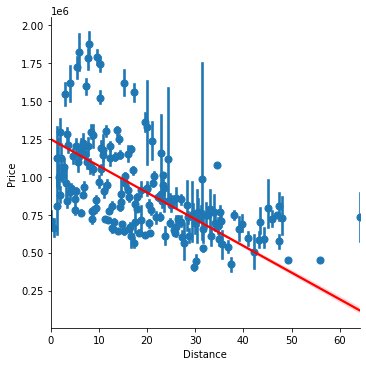

In [27]:
sns.lmplot(x="Distance", y="Price", data=file, x_estimator=np.mean, line_kws={'color': 'red'});
plt.show()

Dựa vào biểu đồ trên ta nhận thấy, giá trị khoảng cách `Distance` càng cao thì giá tiền `Price` càng **giảm** (ở đây khoảng cách được tính từ địa chỉ ngôi nhà được bán đến trung tâm thương mai Melbourne của Úc).

##### Vậy còn số lượng phòng `Rooms` với `Price` 

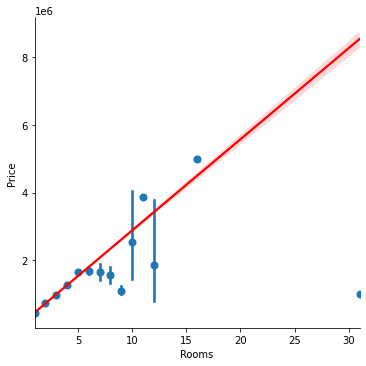

In [28]:
sns.lmplot(x="Rooms", y="Price", data=file, x_estimator=np.mean, line_kws={'color': 'red'});
plt.show()

Dựa vào biểu đồ trên ta nhận thấy, giá trị số phòng `Rooms` càng cao thì giá tiền `Price` càng **tăng** 

####  `Type` vs. `Price`  ?

Sự phân bố `Type` kiểu nhà hiện hữu trong tập dữ liệu

In [29]:
sort_date_df['Type'].value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

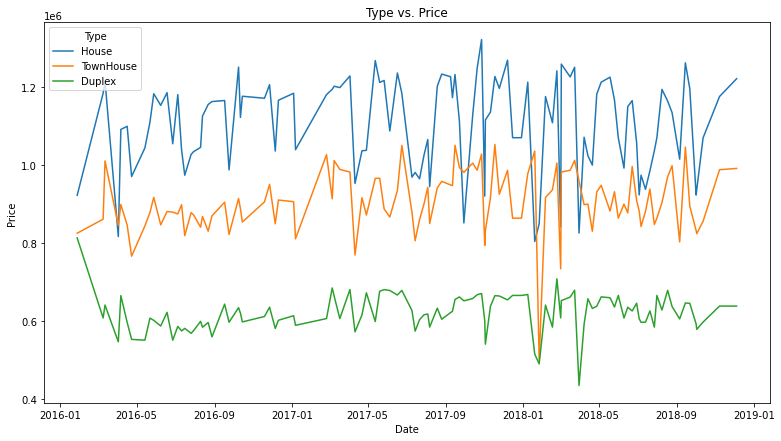

In [30]:
df_type = sort_date_df[['Type', 'Date', 'Price']]

df_type_gb = df_type.groupby(by=['Type', 'Date']).mean()

plt.figure(figsize=(13, 7))
g = sns.lineplot(data=df_type_gb, x='Date', y='Price', hue='Type').set_title('Type vs. Price')
plt.legend(title='Type', loc='upper left', labels=['House', 'TownHouse', 'Duplex'])
plt.show(g)

####  `Method` vs. `Price` ?

Sự phân bố `Method` kiểu nhà hiện hữu trong tập dữ liệu

In [31]:
sort_date_df['Method'].value_counts()

S     34063
PI     9790
SP     8916
VB     5956
SN     2674
PN      651
W       484
SA      416
SS       73
Name: Method, dtype: int64

Tiền xử lí dữ liệu

In [32]:
df_method = sort_date_df[['Method', 'Price']]
df_method_gb = df_method.groupby(by=['Method']).sum()
df_method_gb['Method'] = df_method_gb.index
df_method_gb.reset_index(drop=True, inplace=True)

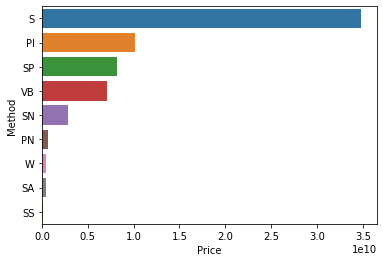

In [33]:
sort_df_method = df_method_gb.sort_values(by="Price", ascending=False).reset_index()
g = sns.barplot(x='Price', y='Method', data=df_method_gb, order=sort_df_method['Method'])
plt.show(g)

Từ bộ đếm giá trị trên ta thấy chủ yếu phương thức giao dịch bất động sản `Method` nằm trong 5 loại `S`, `PI`, `SP`, `VB`, `SN`. <br>Tiếp đến ta xem thực chất 5 method này sẽ ảnh hưởng gì nhiều đến giá nhà.

In [34]:
df_method = sort_date_df[['Method', 'Date', 'Price']]
df_method_gb = df_method.groupby(by=['Method', 'Date'], as_index=False).mean()

Drop những method có chưa ít dữ liệu 

In [35]:
method_drop = ['W', 'PN', 'SA', 'SS']
df_method_gb = df_method_gb[~df_method_gb['Method'].isin(method_drop)]

###### Giá nhà với phương thức giao dịch kiểu `S` vs. `PI`

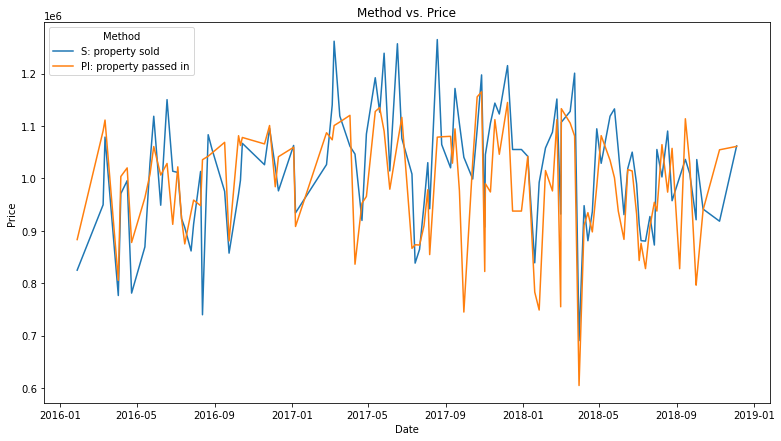

In [36]:
method_view_01 = df_method_gb[df_method_gb['Method'].isin(['S', 'PI'])]
plt.figure(figsize=(13, 7))
g = sns.lineplot(data=method_view_01, x='Date', y='Price', hue='Method').set_title('Method vs. Price')
plt.legend(title='Method', loc='upper left', labels=['S: property sold', 'PI: property passed in'])
plt.show(g)

###### Giá nhà với phương thức giao dịch kiểu`SP` vs. `VB` vs. `SN`

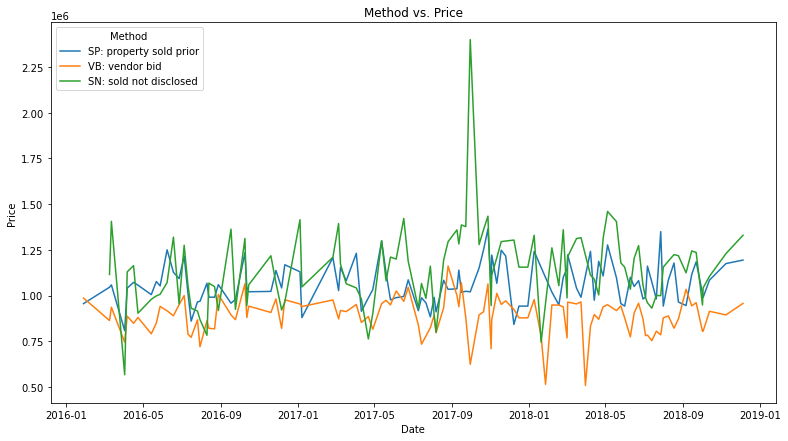

In [37]:
method_view_01 = df_method_gb[df_method_gb['Method'].isin(['SP', 'VB', 'SN'])]
plt.figure(figsize=(13, 7))
g = sns.lineplot(data=method_view_01, x='Date', y='Price', hue='Method').set_title('Method vs. Price')
plt.legend(title='Method', loc='upper left', labels=['SP: property sold prior', 'VB: vendor bid', 'SN: sold not disclosed'])
plt.show(g)

##### Sô lượng nhà, bất động sản nằm trong những mức giá nhất định (với điều kiện nhà dưới 4M đôla úc)

In [38]:
fig = px.histogram(file[file['Price'] < 4000000]['Price'], x="Price",  
                   title='Đồ thị phân phối của giá bất động sản của Melbourne')

fig.add_vline(x=np.median(file.Price), line_dash = 'dash', line_color = 'green', annotation_text='Median')
fig.add_vline(x=np.mean(file.Price), line_dash = 'dash', line_color = 'red', annotation_text='Mean')

fig.show()

Nhận xét về những nguyên nhân ảnh hưởng đến giá tiền `Price`:
- `Distance` và `Rooms`, cả 2 yếu tố đều có tác động đến giá tiền của một ngôi nhà (bất động sản).
- `Type`:
    - Loại house `h` chiếm hơn 72% dữ liệu, giá bất động sản nằm trong khoảng từ 800k AUD tới 1500k AUD
    - Loại townhouse `t` chiếm hơn 17% dữ liệu, giá bất động sản giao động trong khoảng từ 650k AUD tới 1000k AUD
    - Loại duplex `u` chiếm gần 10% dữ liệu, giá bất động sản giao động trong khoảng từ 450k AUD tới 750k AUD
- `Method`:
    - Hai method đầu `S` và `PI` thấy khá tương đồng với nhau tuy nhiên dữ liệu của method `S` nhiều hơn thế nên tổng giá trị sẽ cao hơn method `PI`. 
    - Ba Method `SP`, `VB` và `SN`, nhìn tổng quan thấy `SN` với mức động giao động nhỉn hơn so với 2 loại method còn lại. Mặc dù tổng dữ liệu có trong method `SN` là thấp hơn 2 method còn lại.
- Sự phân bố giá nhà trải dài, từ 0.5M đến 1.5M là chủ yếu.

## 4.2.2 Câu hỏi 2: Nhận định best seller về bất động sản ở Melbourne, đâu là điểm mạnh, điểm yếu của những seller này, từ đó có thể đưa ra chiến lược hợp tác giữa chủ nhà đất và sellerG.

#### Top 10 seller tại Melbourne

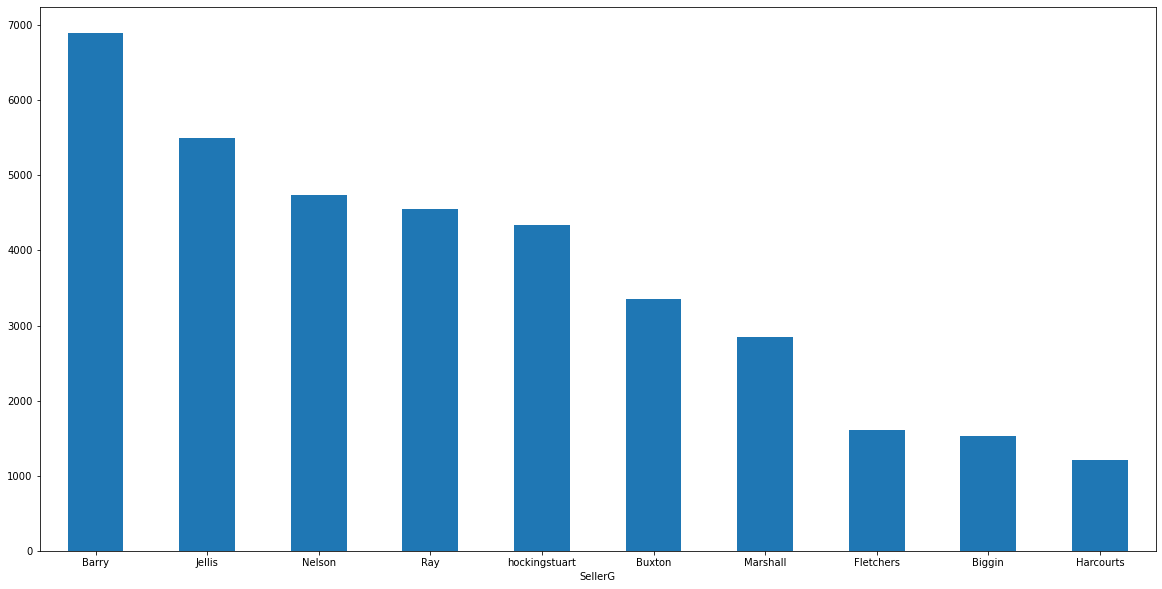

In [39]:
seller_df = file.groupby(['SellerG']).size().sort_values(ascending=False)[:10]
seller_df.plot.bar(rot=0, figsize=(20,10))
plt.show()

Nhận xét tông quan:
- Xét về số lượng bất động sản thì `Barry` đang đứng ở vị trí top 1 
- Theo sau là `Jellis`
- Cùng 3 đại lí `Nelson`, `Ray` và `hockingstuart` đang cạnh tranh vị trí top 3, mức chênh lệch không quá cao.

#### Các seller này bán cố định một loại nhà hay số lượng kiểu nhà đa dạng ?

Xem thử điều này ở top 3 Seller

Bắt đầu cùng top 1 SellerG, đại lí bất động sản: `Barry`

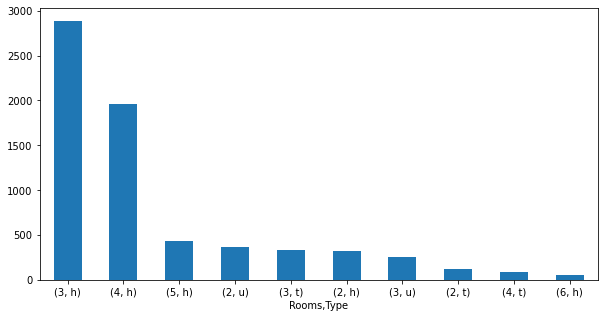

In [40]:
file[file["SellerG"] == 'Barry'].groupby(['Rooms', 'Type']).size().sort_values(ascending=False)[:10].plot.bar(rot=0, figsize=(10,5))
plt.show()

Top 2 SellerG, đại lí bất động sản: `Jellis`

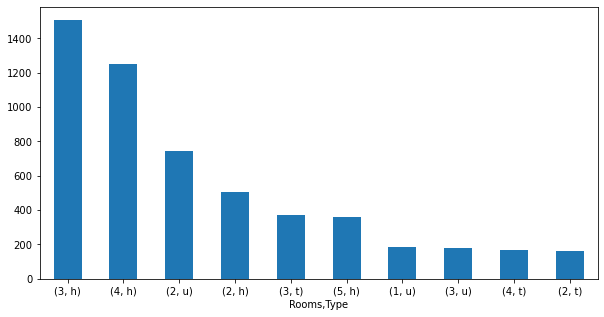

In [41]:
file[file["SellerG"] == 'Jellis'].groupby(['Rooms', 'Type']).size().sort_values(ascending=False)[:10].plot.bar(rot=0, figsize=(10,5))
plt.show()

Top 3 SellerG, đại lí bất động sản: `Nelson`

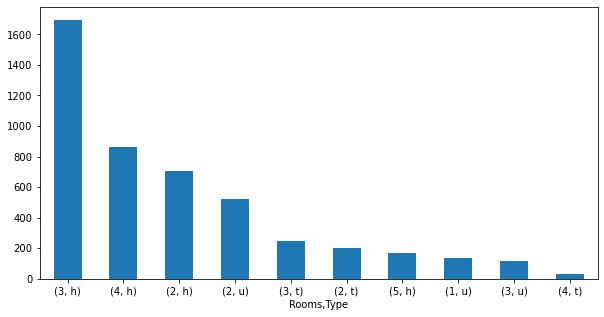

In [42]:
file[file["SellerG"] == 'Nelson'].groupby(['Rooms', 'Type']).size().sort_values(ascending=False)[:10].plot.bar(rot=0, figsize=(10,5))
plt.show()

Nhận xét về 3 top đầu `sellerG`:
- Có thể thấy hầu hếu điểm mạnh của các seller đều là những kiểu nhà từ 3 đến 4 phòng ngủ `Rooms`.
- Với các kiểu nhà `u` Unit hoặc `t` townhouse cũng ít được các seller này bán nhiều vì giá thành cao cũng như kiểu nhà ít được thịnh hành, tuy nhiên `Barry` vẫn được đánh giá cao hơn so với mặt bằng chung.

#### Đối với một kiểu nhà cụ thể, seller nào có số lượng bán cao nhất

Ở đây, ví dụ kiểu nhà `t` townhouse gồm 4 phòng ngủ `Rooms`.

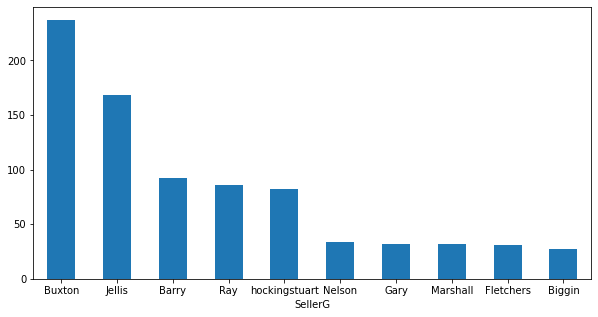

In [43]:
type_house, rooms = ('t', 4)
house_df = file[(file['Type'] == type_house) & (file['Rooms'] == rooms)]
house_df = house_df.groupby(['SellerG']).size().sort_values(ascending=False)[:10]
house_df.plot.bar(rot=0, figsize=(10,5))
plt.show()

Nhận xét:
- Về tổng số lượng nhà bán được thì `Barry` được xem là seller giỏi nhất ở Melbourne tại thời điểm thu thập dữ liệu. Tuy nhiên so với kiểu nhà `t` townhouse này thì `Buxton` lại là seller được đánh giá cao hơn.
- Vì vậy tùy vào từng kiểu nhà muốn bán mà chủ nhà đất có thể cân nhắc và hợp tác với các nhà môi giới bất động sản phù hợp.

## V. Reflection

### 5.1 Những khó khăn gặp phải ?

Dũng:
- Do ảnh hưởng dịch bệnh, phải cách ly nên những ngày cuối timeline về điều kiện cũng không thuận lợi nhiều
- Chưa hiểu ý đồng đội trong team, đôi lúc chưa ăn ý nhau trong việc giải quyết vấn đề
- Một số câu lệnh xử lý dữ liệu chưa nắm được hết
- Phân chia thời gian làm việc đôi lúc chưa được hiệu quả với thành viên trong nhóm

Nam Anh:
- Tình hình dịch bệnh kéo dài, hiện trạng học online vẫn tiếp tục. Đồ án cùng bài tập và bài thi cùng lúc đến nên em đã lựa chọn 

### 5.2 Kinh nghiệm gặt hái được ?

Dũng:
- Hiểu hơn một số kiến thức về bất động sản
- Có được kinh nghiệm, phối hợp ăn ý hơn với thành viên trong nhóm
- Nâng cao được khả năng team work ngay những lúc điều kiện không thuận lợi
- Nắm được vững hơn về các quy trình như tiền xử lý dữ liệu, trực quan hóa dữ liệu, lối suy nghĩ đặt vấn đề
- Cải thiện các kỹ năng về git, các kỹ năng mềm như ngoại ngữ

Nam Anh

### 5.3 Nếu có thêm thời gian thì cả nhóm sẽ mở rộng bài toán ra sao ?

- Đào bới nhiều thêm các thuộc tính khác của tập dữ liệu
- Đi sâu hơn để giải quyết bài toán 'bong bóng nhà đất' ở Melbourne
- Trực quan hóa dữ liệu đa dạng hơn

## VI. References

##### To finish this project, what materials have you consulted?

[1] [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market) <br>
[2] [Plotly](https://plotly.com/python/) <br>
[3] [Seaborn](https://seaborn.pydata.org/) <br>
[4] [Sklearn](https://scikit-learn.org/stable/) <br>
    